## Mounting Drive to use external python scripts and to access the dataset from google drive 

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## Importing 'sys' to run external python scripts on colab

In [ ]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks')

## Improting neccessary libraries

In [ ]:
!pip install tensorboardX

     |████████████████████████████████| 124 kB 5.4 MB/s 


In [ ]:
import numpy as np
import scipy
from scipy import spatial
import scipy.io as io
from scipy.ndimage.filters import gaussian_filter
import os
import glob
import matplotlib.pyplot as plt
import h5py
import PIL.Image as Image
import random

import torch
import torch.nn as nn
from tensorboardX import SummaryWriter
from torchvision import datasets, transforms

from matplotlib import cm as CM
import matplotlib.pyplot as plt
%matplotlib inline

# **This following code block generates ground truth values from the dataset using k-nearst based gaussian kernel**

```
points: a two-dimension list of pedestrians' annotation with the order [[col,row],[col,row],...].`

img: input images.
```

```
return:
  density: Same shape as input image but only with one channel.
```

some of the codes are borrowed from: 
*   https://github.com/davideverona/deep-crowd-counting_crowdnet
*   Analaytics Vidhya
*   https://github.com/CommissarMa/MCNN-pytorch.git






In [ ]:
def gaussian_density(img,points):

    img_shape=[img.shape[0],img.shape[1]]
    print("Image Shape: ",img_shape,". Need generate ",len(points),"gaussian kernels.")
    density = np.zeros(img_shape, dtype=np.float32)
    groundtruth_count = len(points)
    if groundtruth_count == 0:
        return density

    # Building KD Tree
    leafsize = 2048
    tree = scipy.spatial.KDTree(points.copy(), leafsize=leafsize)
    distances, locations = tree.query(points, k=4)

    print ('Generating d\Density...')
    for i, pt in enumerate(points):
        pt2d = np.zeros(img_shape, dtype=np.float32)
        if int(pt[1])<img_shape[0] and int(pt[0])<img_shape[1]:
            pt2d[int(pt[1]),int(pt[0])] = 1.
        else:
            continue
        if groundtruth_count > 1:
            sigma = (distances[i][1]+distances[i][2]+distances[i][3])*0.1
        else:
            sigma = np.average(np.array(pt.shape))/2./2. #case: 1 point
        density += scipy.ndimage.filters.gaussian_filter(pt2d, sigma, mode='constant')
    print ('done.')
    return density

## Groundtruth generation for ShanghaiTech's Part A and B


In [ ]:

root = "/content/drive/My Drive/ShanghaiTech"
#root2 = "/content/drive/My Drive"


part_A_train = os.path.join(root,'part_A/train_data','images')
part_A_test = os.path.join(root,'part_A/test_data','images')
# part_B_train = os.path.join(root,'part_B/train_data','images')
# part_B_test = os.path.join(root,'part_B/test_data','images')
#path_UCF = os.path.join(root2, 'UCF_CC_50')
path_sets = [part_A_train,part_A_test]
#path_sets = [part_B_train,part_B_test]
#path_sets = [path_UCF]



In [ ]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)


In [ ]:
for img_path in img_paths:
    print(img_path)
    mat_load = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground-truth').replace('IMG_','GT_IMG_'))
    img= plt.imread(img_path)
    k = np.zeros((img.shape[0],img.shape[1]))
    points = mat_load["image_info"][0,0][0,0][0]
    k = gaussian_density(img,points)
    
    # Write Density map to disk
    np.save(img_path.replace('.jpg','.npy').replace('images','ground-truth'), k)

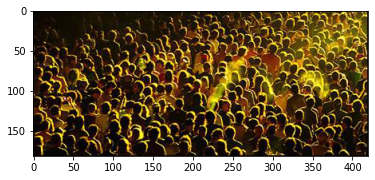

In [ ]:
plt.imshow(Image.open(img_paths[1]))

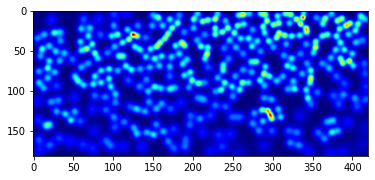

In [ ]:
groundtruth_count = np.load(img_paths[1].replace('.jpg','.npy').replace('images','ground-truth'))
plt.imshow(groundtruth_count,cmap=CM.jet)

In [ ]:
print("Groundtruth count", np.sum(groundtruth_count))

Groundtruth count 348.66864


In [ ]:
!pip install tensorboardX

In [ ]:
%run '/content/drive/MyDrive/Colab Notebooks/train.py'

/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Streaming output truncated to the last 5000 lines.
818.88965
tensor(816.4457)
358.85272
tensor(357.3049)
798.22076
tensor(798.4513)
240.04814
tensor(238.6606)
285.79352
tensor(283.8699)
757.56964
tensor(756.6241)
155.25244
tensor(154.8056)
63.771175
tensor(63.7910)
566.3514
tensor(559.8776)
664.6156
tensor(662.7848)
269.5229
tensor(268.3533)
332.167
tensor(332.1956)
119.68278
tensor(119.6911)
115.293236
tensor(114.7308)
352.79068
tensor(350.9243)
246.90747
tensor(246.9103)
714.8915
tensor(711.7897)
214.00536
tensor(212.4879)
293.468
tensor(292.1660)
350.46442
tensor(346.1698)
243.43245
tensor(242.2685)
598.335
tensor(596.0139)
1358.6707
tensor(1357.2423)
166.52234
tensor(165.5714)
2244.1497
tensor(2238.7014)
204.67825
tensor(204.6863)
193.19897
tensor(192.6580)
1106.2274
tensor(1106.3503)
715.103
tensor(712.8070)
212.93024
tensor(212.1493)
228.37965
tensor(227.3250)
210.90385
tensor(209.8627)
408.96158
tensor(408.0519)
367.93597
tensor(367.9709)
90.66177
tensor(90.5090)
159.31194
tenso